# Fake News Classification

#### Fake news classification is a process that involves analyzing news content to determine its truthfulness. The ultimate goal of this project is to build a reliable and efficient algorithm that can accurately classify news articles as either fake or genuine, and thus help users make informed decisions when consuming information online. In this we use different machine learning models to classify the news.



#### Dataset: https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection

## Importing Libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.metrics import accuracy_score

import warnings 
warnings.filterwarnings('ignore')

## Importing Dataset

In [56]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [57]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [58]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Inserting a column "class" as target feature

In [59]:
df_fake["class"] = 0
df_true["class"] = 1

In [60]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [61]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [62]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [63]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

In [64]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [65]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [66]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

## Merging True and Fake Dataframes

In [67]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.sample(10)

,title,text,subject,date,class
14810,Explosions rock Zimbabwe capital as coup specu...,HARARE (Reuters) - Several loud explosions ech...,worldnews,"November 15, 2017",1
5937,Kansas GOP Will Undercut State Supreme Court ...,"Kansas education system is a mess, thanks to ...",News,"June 10, 2016",0
5801,Nearly half of Britons back Trump state visit:...,LONDON (Reuters) - Around half of Britons beli...,politicsNews,"February 1, 2017",1
5451,Challenge to Trump travel ban moves forward in...,SAN FRANCISCO (Reuters) - The most consequenti...,politicsNews,"February 13, 2017",1
2068,Mattis: not decided on number of extra U.S. tr...,BAGHDAD (Reuters) - U.S. Defense Secretary Jam...,politicsNews,"August 22, 2017",1
17428,Young conservative Kurz on track to be Austria...,VIENNA (Reuters) - Young conservative star Seb...,worldnews,"October 15, 2017",1
16307,Czech election winner Babis warms to minority ...,PRAGUE (Reuters) - The anti-establishment ANO ...,worldnews,"October 27, 2017",1
23194,Hillary’s ‘Russian Hack’ Hoax: The Biggest Lie...,Patrick Henningsen 21st Century WireThe longe...,Middle-east,"November 1, 2016",0
12219,"Kremlin says to defend rights of Kerimov, busi...",MOSCOW (Reuters) - Kremlin spokesman Dmitry Pe...,worldnews,"December 15, 2017",1
5137,Muslim Olympian Takes Gold Medal Jab At ‘Dang...,Ibtihaj Muhammad is on the Olympic fencing tea...,News,"August 8, 2016",0


In [68]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

## Removing columns which are not required

In [69]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [72]:
df.isnull().sum()

text     0
class    0
dtype: int64

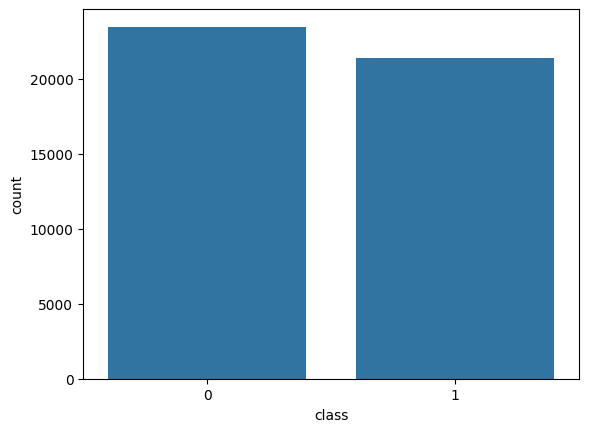

In [77]:
sns.countplot(x=df['class'])
plt.show()

## Random Shuffling the dataframe

In [78]:
df = df.sample(frac = 1)

In [79]:
df.head()

,text,class
1601,There has long been speculation that Melania T...,0
14259,"No ,it s not a reality show but Obama s made i...",0
22589,21st Century Wire says As 21WIRE reported yest...,0
18829,TOKYO (Reuters) - A fledgling party led by pop...,1
8858,Rapper Blac Youngsta went to an Atlanta bank t...,0


In [80]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [81]:
df.columns

Index(['text', 'class'], dtype='object')

In [22]:
df.head()

,text,class
0,SOCHI/MOSCOW (Reuters) - President Vladimir Pu...,1
1,(This version of the Sept. 20 story corrects ...,1
2,"Barack Obama s legacy will be a divided, lawle...",0
3,LUXEMBOURG/BRUSSELS (Reuters) - The EU s highe...,1
4,WASHINGTON (Reuters) - President Donald Trump’...,1


## Creating a function to process the texts

In [82]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [83]:
df["text"] = df["text"].apply(wordopt)

## Defining dependent and independent variables

In [84]:
x = df["text"]
y = df["class"]

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Splitting Training and Testing

## Convert text to vectors

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)
print('train score: ',LR.score(xv_train,y_train)*100)

train score:  99.08491294788757


In [88]:
pred_lr=LR.predict(xv_test)

In [89]:
LR_accuracy= LR.score(xv_test, y_test)
print("Accuracy:", LR_accuracy*100)

Accuracy: 98.81461675579322


In [90]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5844
           1       0.99      0.99      0.99      5376

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Decision Tree Classification

In [91]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
print('train score: ',DT.score(xv_train,y_train)*100)

train score:  99.99702893814249


In [92]:
pred_dt = DT.predict(xv_test)

In [93]:
DT_accuracy = DT.score(xv_test, y_test)
print("Accuracy:", DT_accuracy*100)

Accuracy: 99.58110516934046


In [94]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5844
           1       1.00      0.99      1.00      5376

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Gradient Boosting Classifier

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
print('train score: ',GBC.score(xv_train,y_train)*100)

train score:  99.70289381424922


In [96]:
pred_gbc = GBC.predict(xv_test)

In [97]:
GBC_accuracy= GBC.score(xv_test, y_test)
print("Accuracy:", GBC_accuracy*100)

Accuracy: 99.54545454545455


In [98]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5844
           1       0.99      1.00      1.00      5376

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
print('train score: ',RFC.score(xv_train,y_train)*100)

train score:  99.99702893814249


In [100]:
pred_rfc = RFC.predict(xv_test)

In [101]:
RFC_accuracy = RFC.score(xv_test, y_test)
print("Accuracy:", RFC_accuracy*100)

Accuracy: 98.68983957219251


In [102]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5844
           1       0.99      0.99      0.99      5376

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Model Testing

In [103]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format
(output_lable(pred_LR[0]), output_lable(pred_DT[0]), output_lable(pred_GBC[0]), output_lable(pred_RFC[0])))

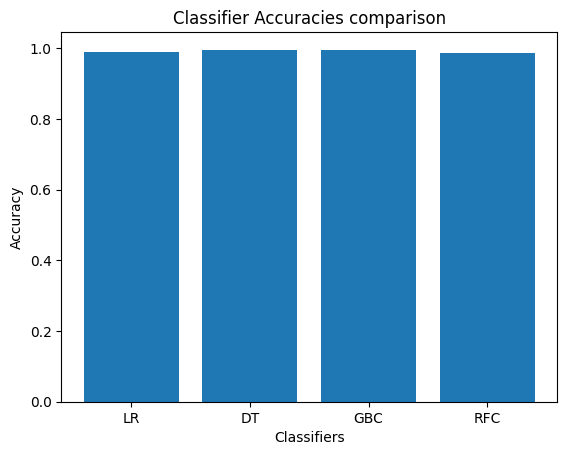

In [104]:
# Define the names of classifiers and their corresponding accuracy scores
classifiers = ['LR', 'DT', 'GBC', 'RFC']
accuracies = [LR_accuracy, DT_accuracy, GBC_accuracy, RFC_accuracy]

plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies comparison')
plt.show()

In [105]:
news = str(input())
manual_testing(news)

  By Dady Chery and Gilbert MercierAll writers with a desire to rattle people out of their torpor occasionally wonder if it is worthwhile to continue to try to raise their voices over the din of lies and distractions.More and more for us, such thoughts are occasioned, not by the mainstream, which predictably treats all the pronouncements from the powerful as being newsworthy, but by the fake left, which lobotomizes most of whom it touches. The increasing sophistication of this group and its rate of expansion are astounding. Its purpose is to annihilate and replace the real left, and it is making great strides in this regard.The real left includes those who, like Dr. Martin Luther King Jr. (MLK), came to realize that quantum leaps are the way to proceed, rather than tiny incremental change. The real left does not curry favor or approval from those in power; it challenges the social status quo and respects the inherent right of an injured and indignant population to rebel against authori



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [106]:
news = str(input())
manual_testing(news)

 MOSCOW (Reuters) - Vatican Secretary of State Cardinal Pietro Parolin said on Tuesday that there was  positive momentum  behind the idea of Pope Francis visiting Russia, but suggested there was more work to be done if it were to happen.  Parolin, speaking at a joint news conference in Moscow alongside Russian Foreign Minister Sergei Lavrov, did not give any date for such a possible visit. The Eastern and Western branches of Christianity split apart in 1054. The pope, leader of the world s 1.2 billion Catholics, is seeking to improve ties, and last year in Cuba held what was the first ever meeting between a Roman Catholic pope and a Russian Orthodox patriarch.  Parolin said he had also used his talks in the Russian capital to also raise certain difficulties faced by the Catholic Church in Russia. He said that Moscow and the Vatican disagreed about the plight of Christians in certain parts of the world. He did not elaborate. Parolin, who is due later on Tuesday to meet Patriarch Kirill,



LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News
